In [13]:
import os
import sys
import nhl_data_loader
import importlib
importlib.reload(nhl_data_loader)

if os.path.join(os.path.dirname(os.getcwd()), "controller") not in sys.path:
    sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "controller"))
from nhl_data_downloader import NHLDataDownloader
from nhl_data_loader import NHLDataLoader

loader = NHLDataLoader()
downloader = NHLDataDownloader()

In [14]:
#will download all seasons from 2016 to 2019
train_val_df = loader.load_csv_files([2016,2017,2018,2019])
print(train_val_df.head())

      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020001  2016-10-12             9       1          00:00         5   
1  2016020001  2016-10-12             9       1          00:00         6   
2  2016020001  2016-10-12             9       1          00:05        51   
3  2016020001  2016-10-12             9       1          00:05         7   
4  2016020001  2016-10-12             9       1          00:43       201   

     event_type  is_goal shot_type  x_coord  ...  last_x_coord  last_y_coord  \
0  period-start    False   Unknown      NaN  ...       unknown       unknown   
1       faceoff    False   Unknown      0.0  ...       unknown       unknown   
2      stoppage    False   Unknown      NaN  ...       unknown       unknown   
3       faceoff    False   Unknown     69.0  ...       unknown       unknown   
4      takeaway    False   Unknown    -81.0  ...       unknown       unknown   

  time_since_last_event distance_from_last_event  rebound  \
0

In [22]:

import logistic_model_analyzer
import importlib
importlib.reload(logistic_model_analyzer)
from logistic_model_analyzer import LogisticModelAnalyzer

analyzer = LogisticModelAnalyzer(train_val_df)
analyzer.run_analysis(features=["shooting_distance"])


Filtering data...
Preparing data...
Preparing data with features: ['shooting_distance']...
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Training model...
Evaluating model...
Validation Accuracy: 0.91

Plotting confusion matrix...


In [23]:
analyzer.run_analysis(features=["shooting_distance"],apply_smote=True)

Filtering data...
Preparing data...
Preparing data with features: ['shooting_distance']...
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Applying SMOTE to oversample minority class...
SMOTE applied. Training data balanced: 474240 samples.
Training model...
Evaluating model...
Validation Accuracy: 0.54

Plotting confusion matrix...


Training Distance Only model...
Preparing data with features: ['shooting_distance']...
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.6719791076861982, Log Loss=0.30546528292590275


AUC,▁
Log Loss,▁
AUC,0.67198
Log Loss,0.30547


Training Angle Only model...
Preparing data with features: ['shot_angle']...
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.49837933946239266, Log Loss=0.31278361860987236


AUC,▁
Log Loss,▁
AUC,0.49838
Log Loss,0.31278


Training Distance and Angle model...
Preparing data with features: ['shooting_distance', 'shot_angle']...
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.6719678611677506, Log Loss=0.30546545214659176


AUC,▁
Log Loss,▁
AUC,0.67197
Log Loss,0.30547


Generating random probabilities for Random Baseline...
Logging metrics: AUC=0.5015990266381705, Log Loss=0.9982962174582751


AUC,▁
Log Loss,▁
AUC,0.5016
Log Loss,0.9983


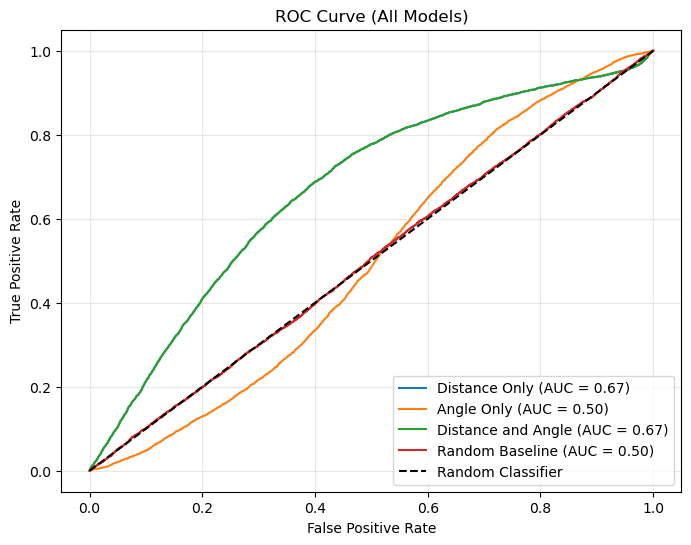

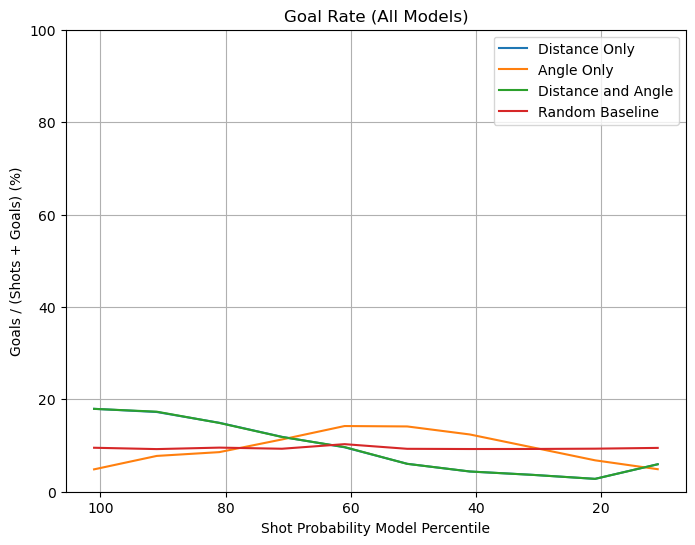

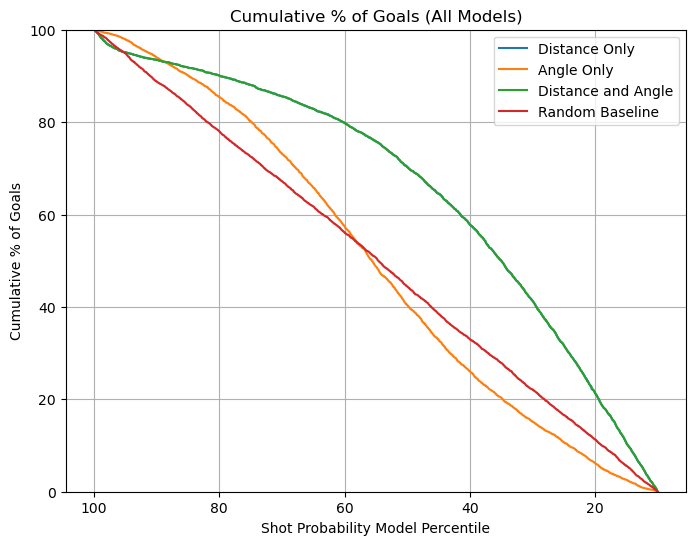

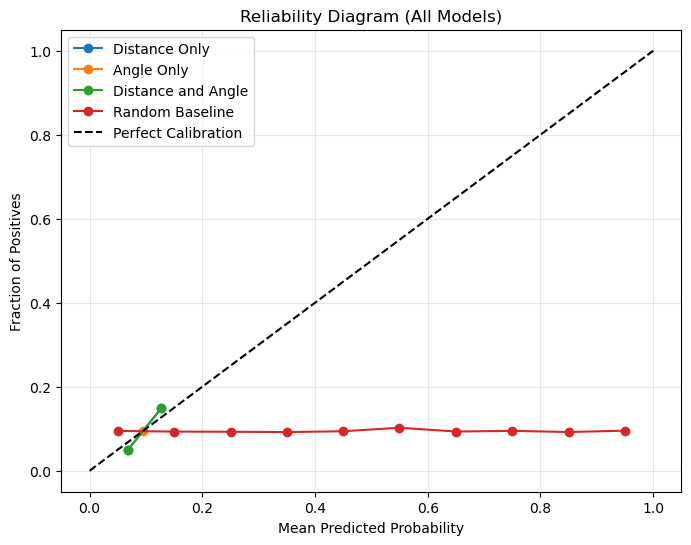

In [24]:
analyzer.evaluate_multiple_models()
